## Lab: Cluster Anlaysis with Wine Data¶
Load in the Wine dataset in the cooresponding assets directory and attempt the following:
Perform K-Means with evaluation metrics for silhouette.

In [47]:
# basic libraries
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter

# sklearn
from sklearn import metrics, cluster, model_selection, datasets

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load the dataset

In [4]:
df = pd.read_csv("../2.1-tuning-clusters/assets/datasets/wine.csv")

## 2. Check for bad/missing data

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 3. Explore features with scatterplots/pairplots

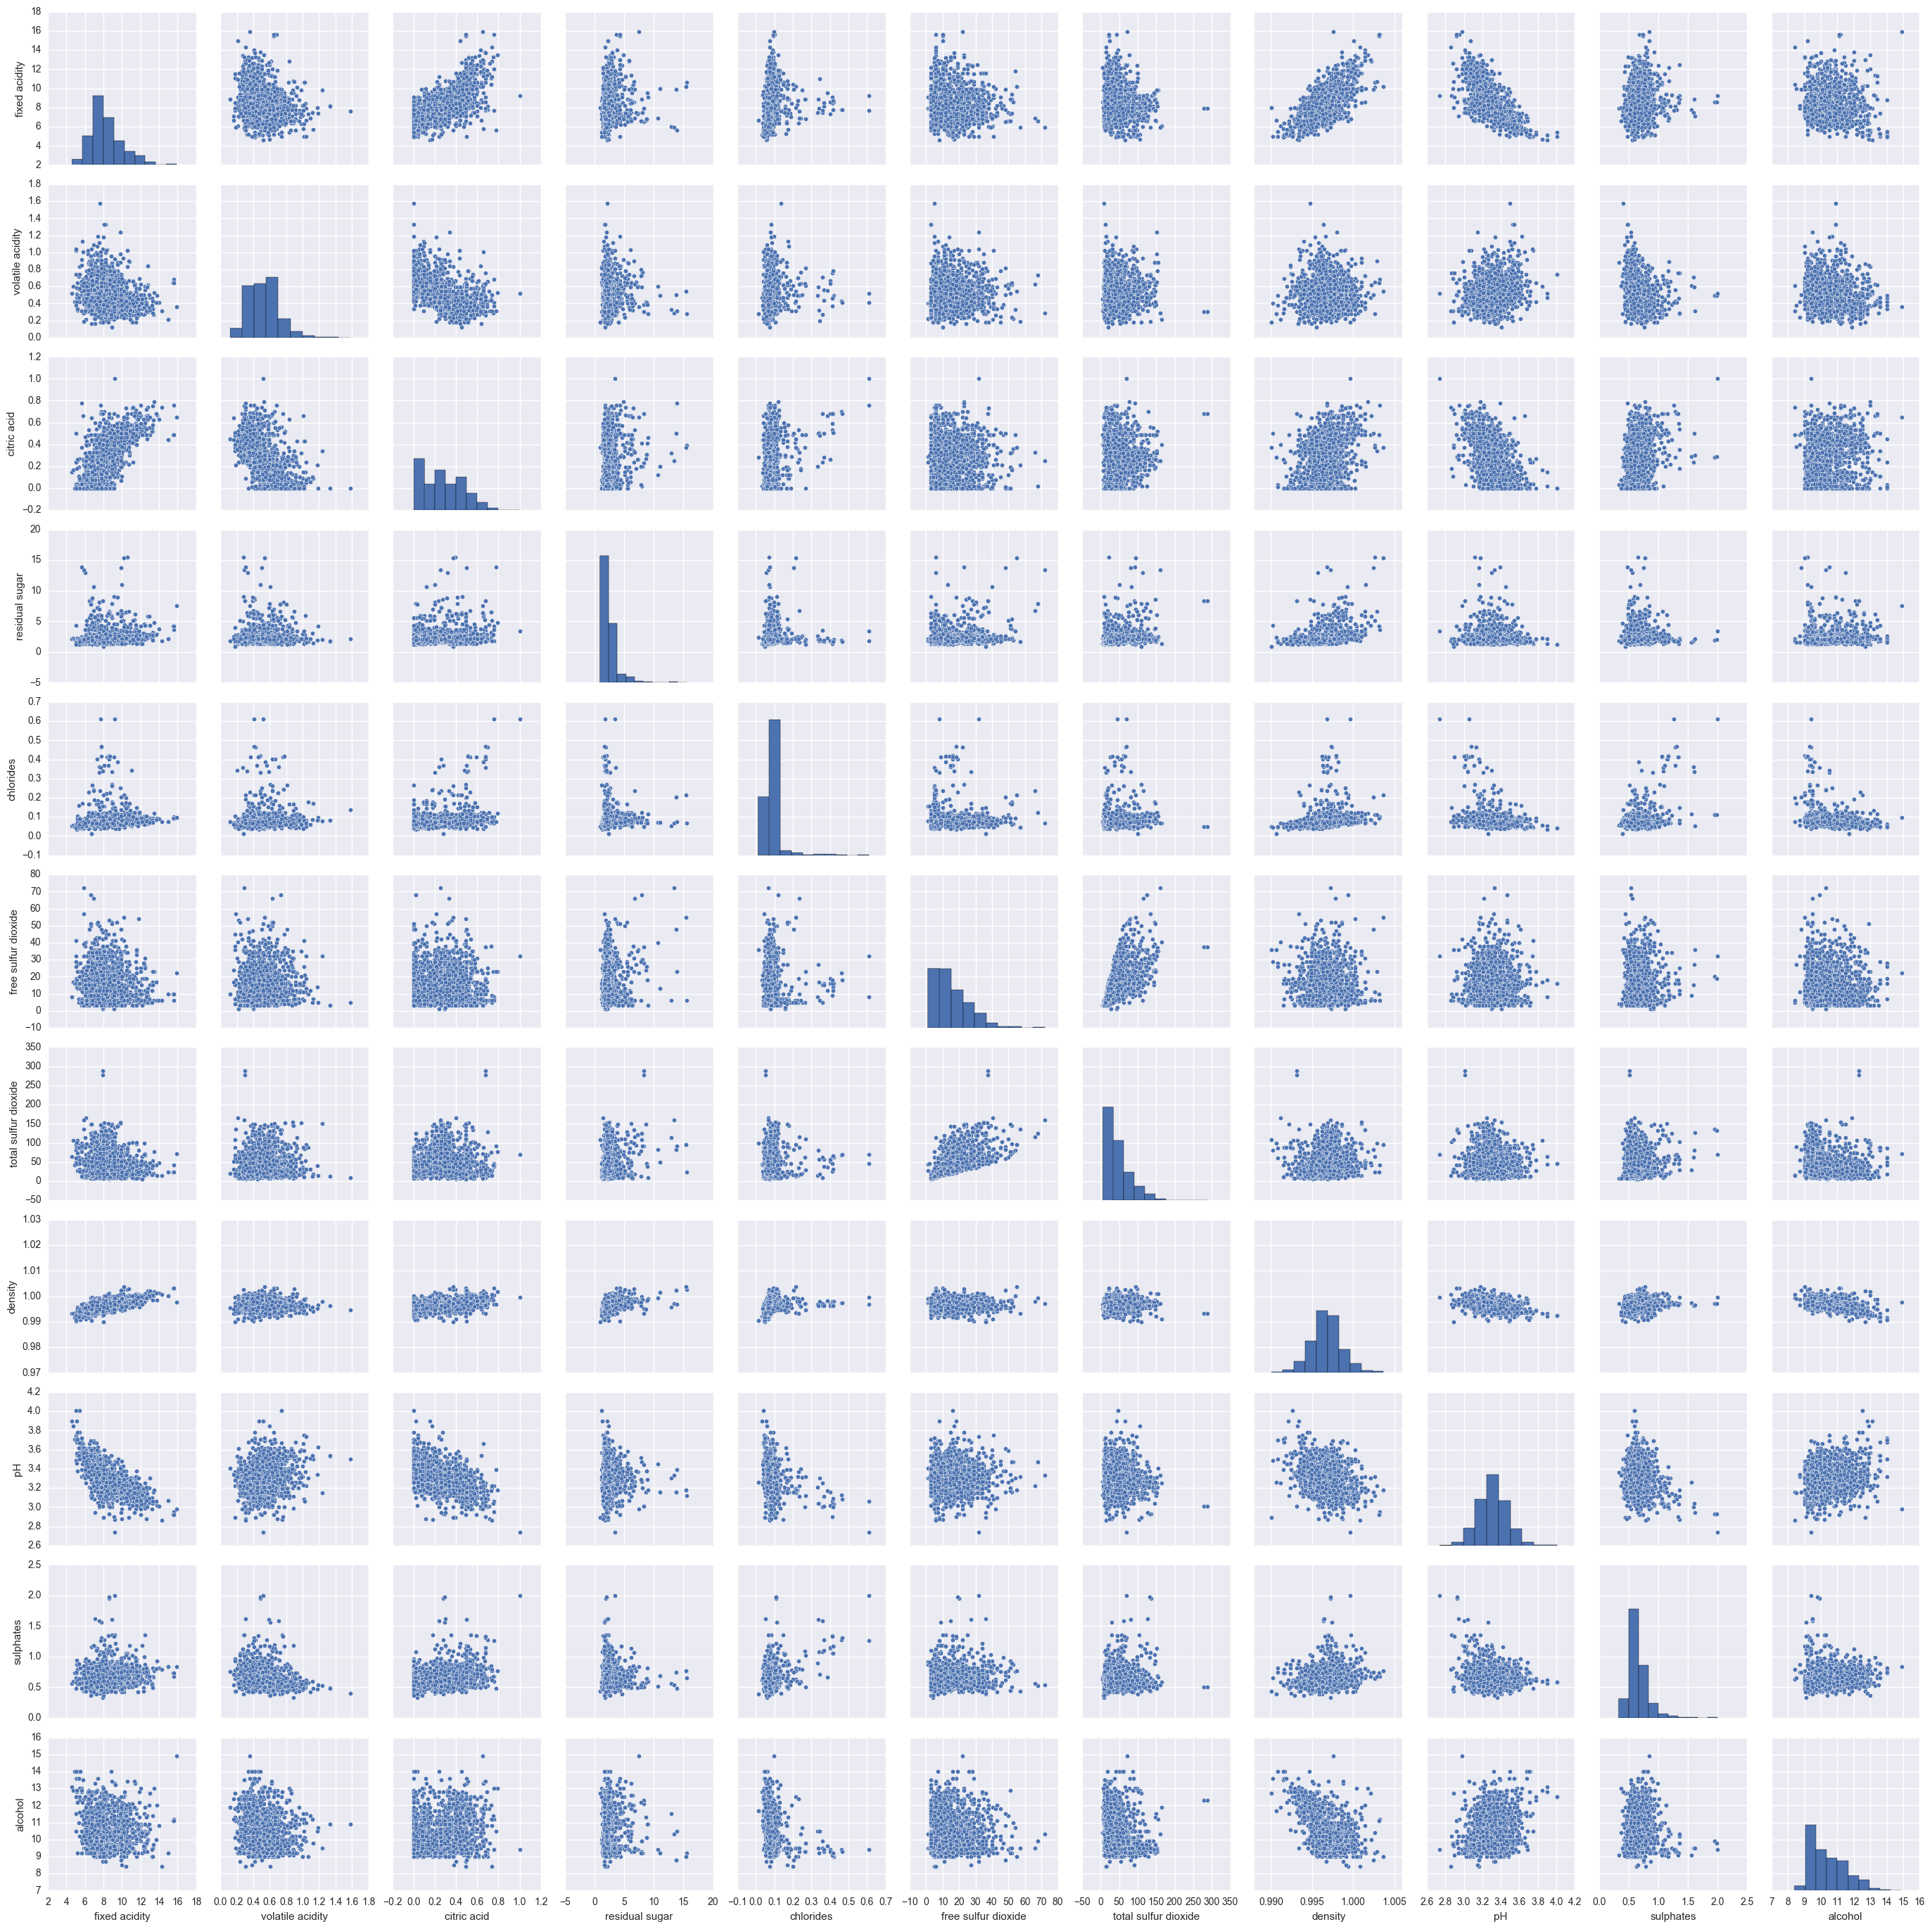

In [8]:
sns.pairplot(df.iloc[:,:-1])

## 4. Any interesting relationships/clusters to be noted?

NO EVERYTHING IS JUST BLOBS

## 5. Plot KMeans scatters with centroids

In [27]:
X = df.iloc[:,:-1]

In [114]:
y_actual = df["quality"]

In [116]:
Counter(y_actual)

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

In [117]:
# bin the ys
y = y_actual.map(lambda x: 1 if x > 5 else 0)

In [118]:
k = 2

In [119]:
km = cluster.KMeans(n_clusters=k)
km.fit(X)
predicted = km.predict(X)

In [120]:
# labels = km.labels_
centroids = km.cluster_centers_

In [121]:
Counter(km.predict(X))

Counter({0: 420, 1: 1179})

In [122]:
Counter(y)

Counter({0: 744, 1: 855})

In [124]:
Counter(km.labels_)

Counter({0: 420, 1: 1179})

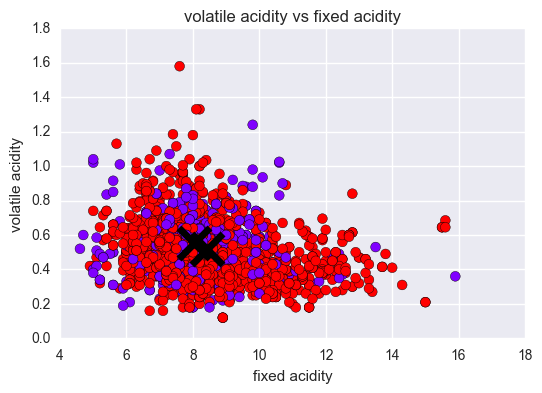

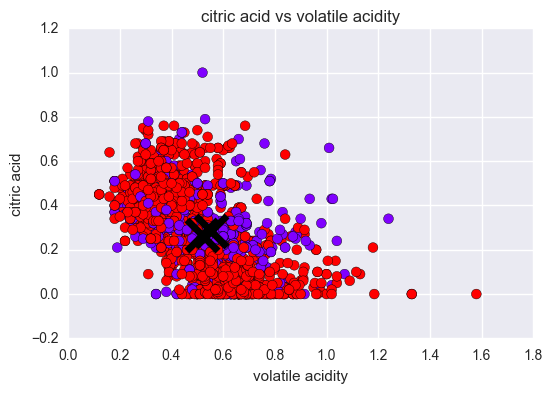

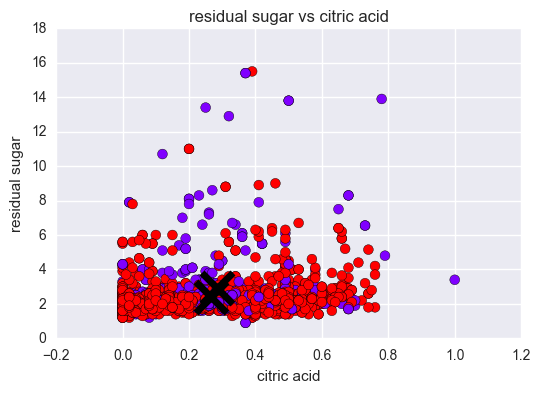

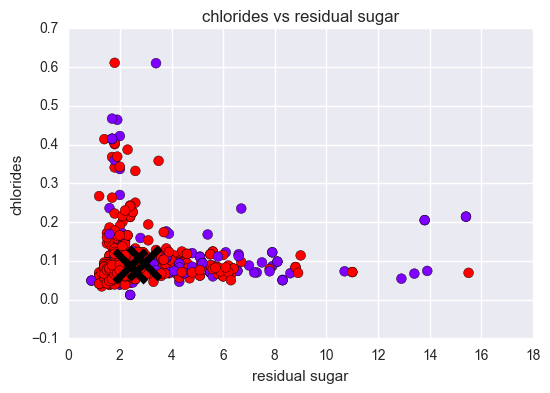

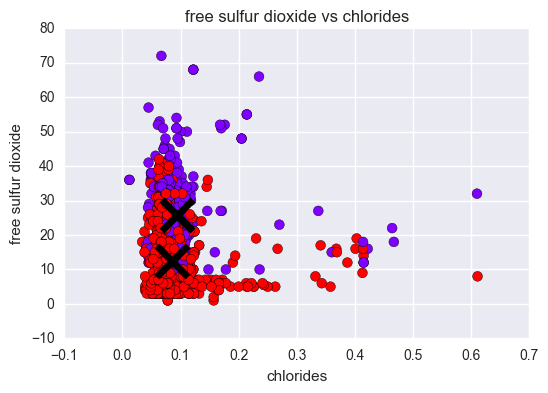

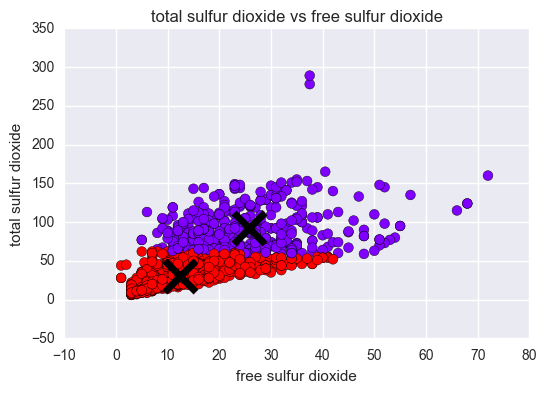

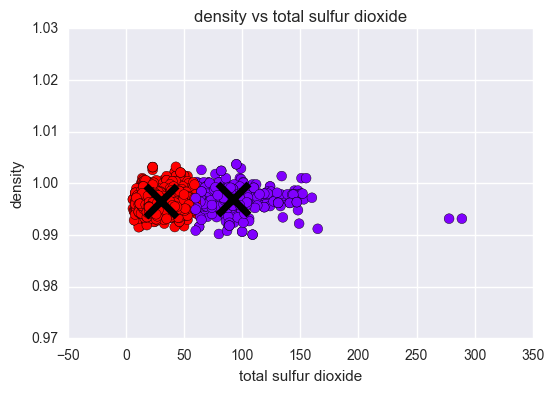

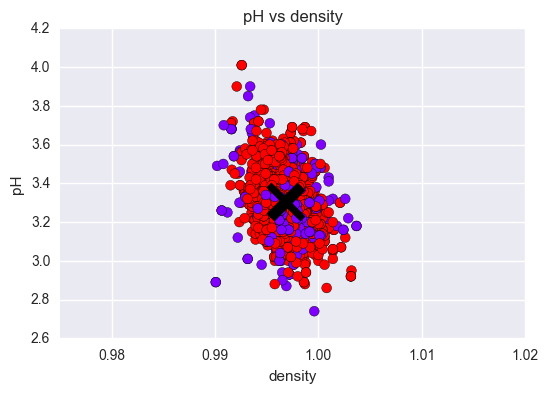

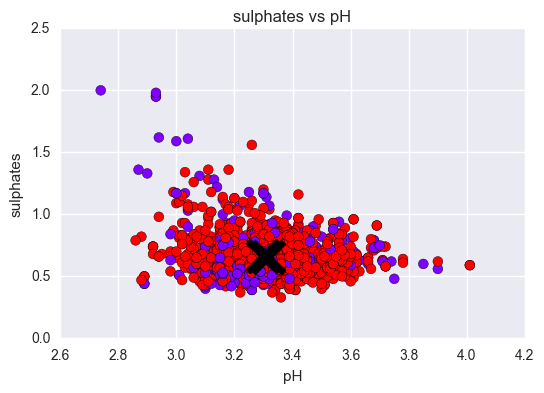

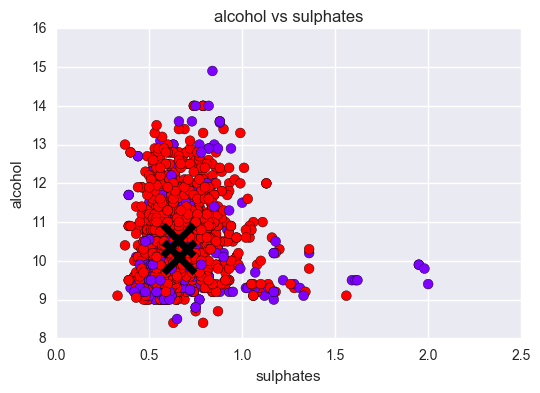

In [126]:
for i, _ in enumerate(X.columns[:-1]):
    plt.scatter(X.iloc[:,i], X.iloc[:,i+1], c=km.labels_, s=50, cmap='rainbow');
    plt.scatter(centroids[:, i], centroids[:, i+1],
                marker='x', s=500, linewidths=5,
                color='k', zorder=10);
    plt.xlabel(X.columns[i]);
    plt.ylabel(X.columns[i+1]);
    plt.title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

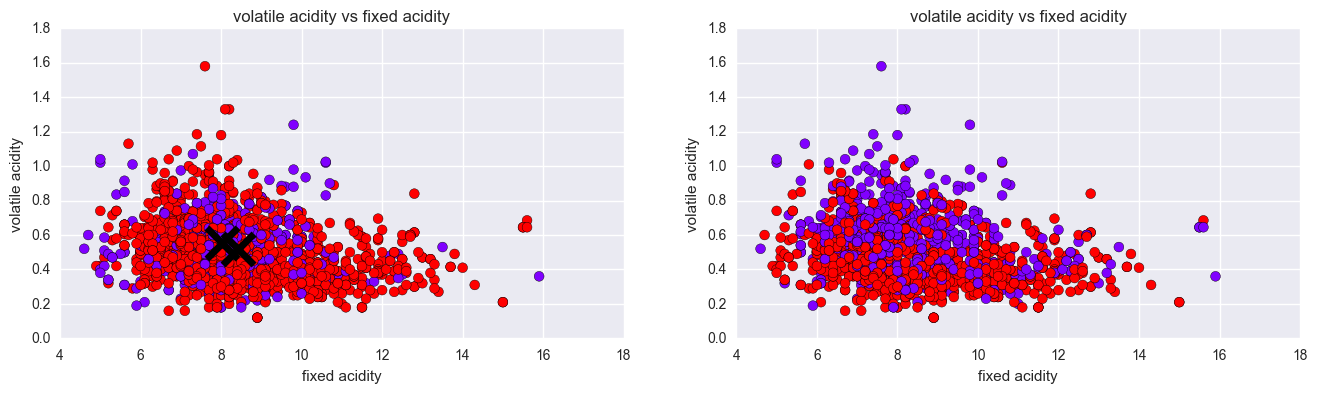

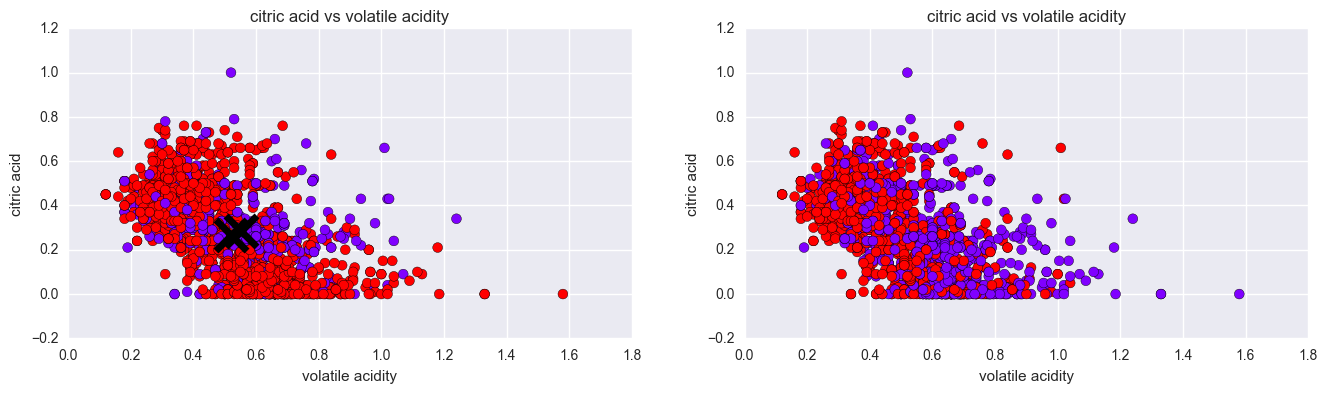

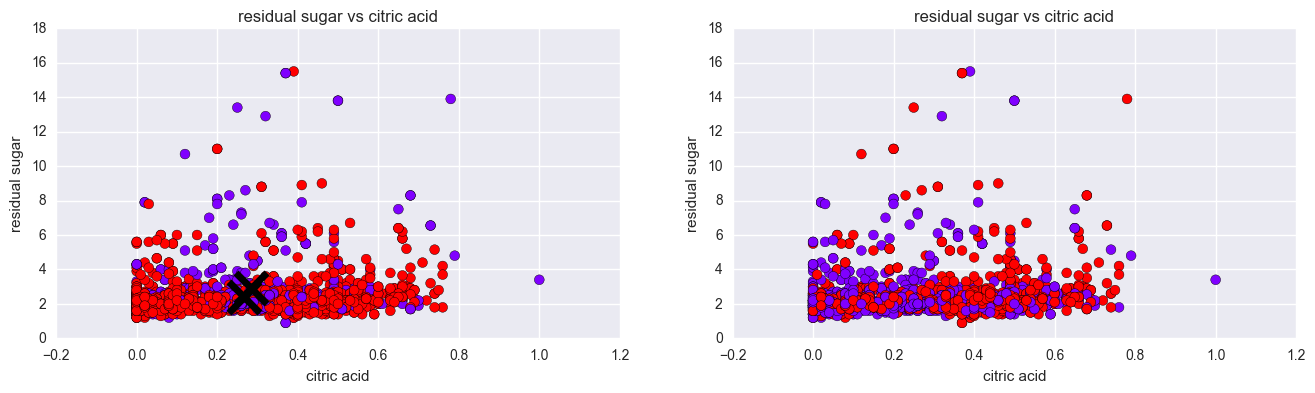

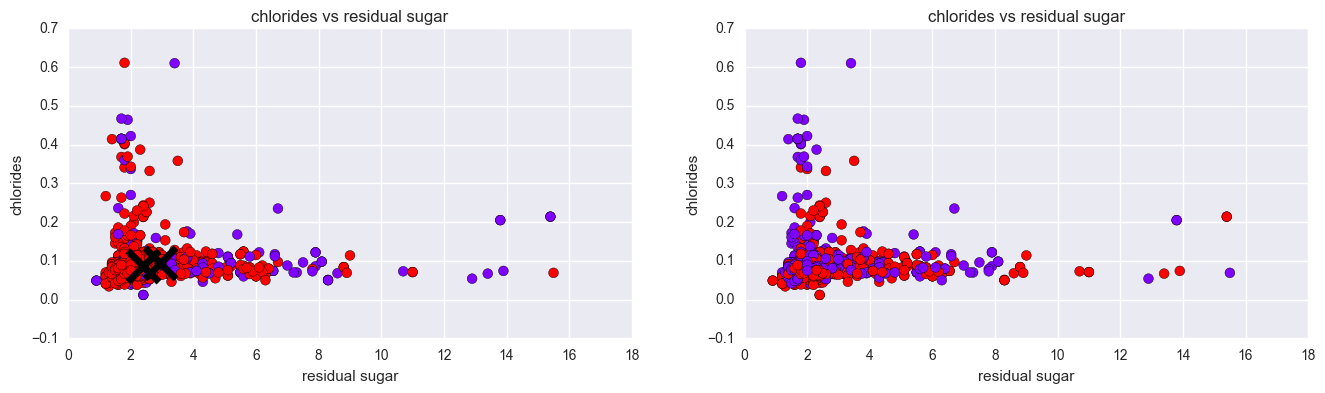

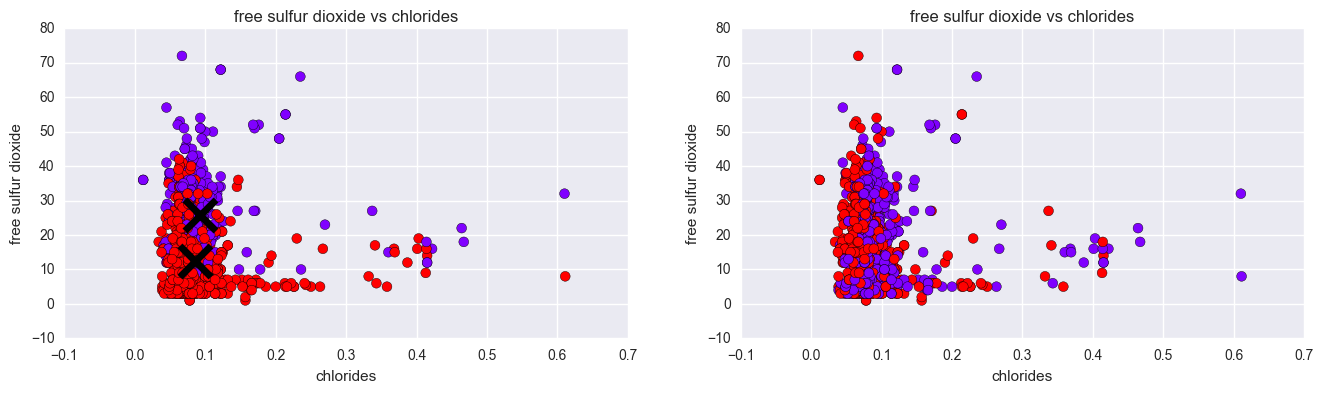

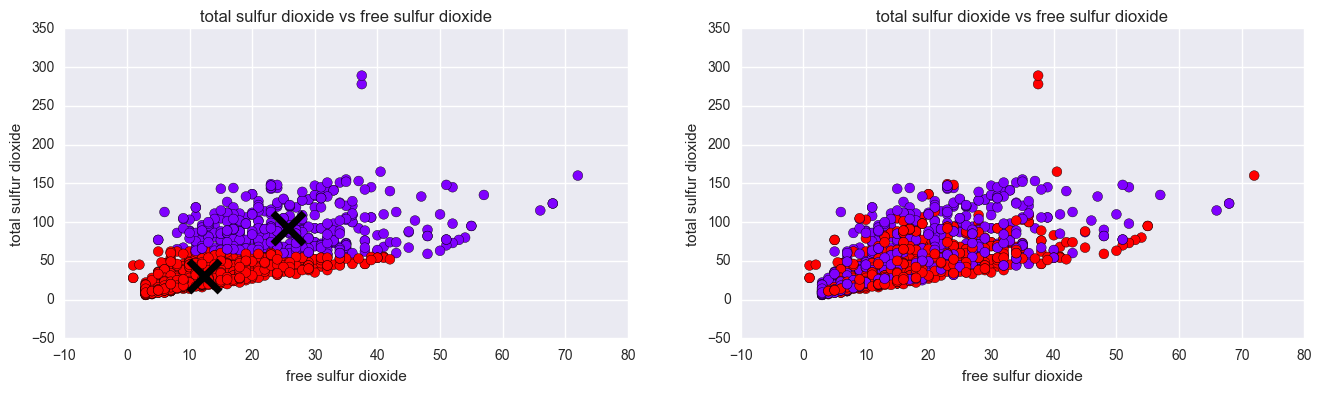

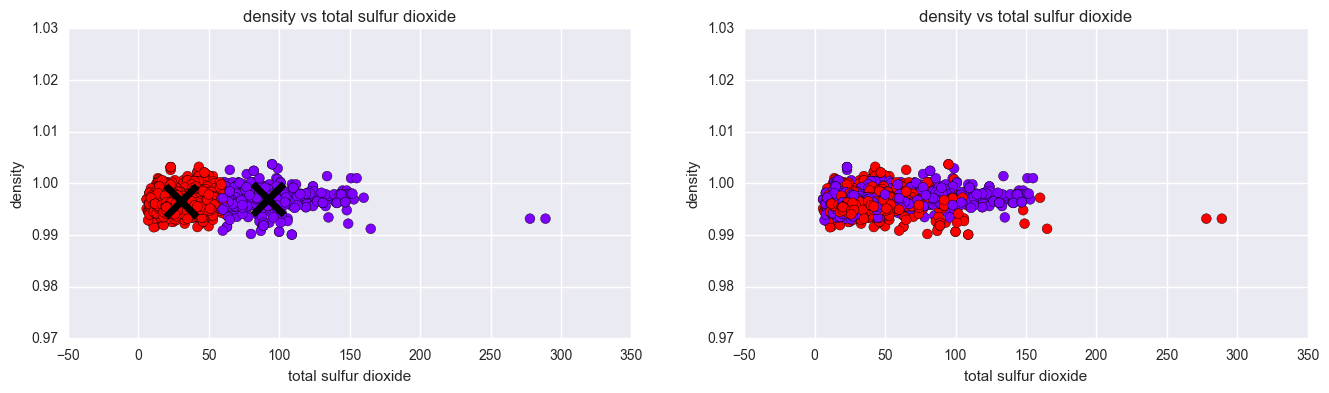

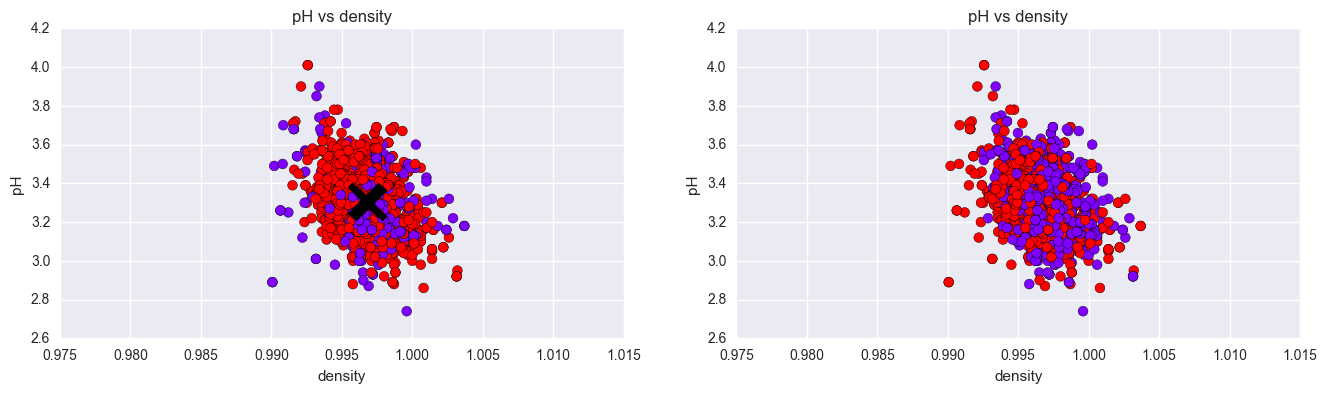

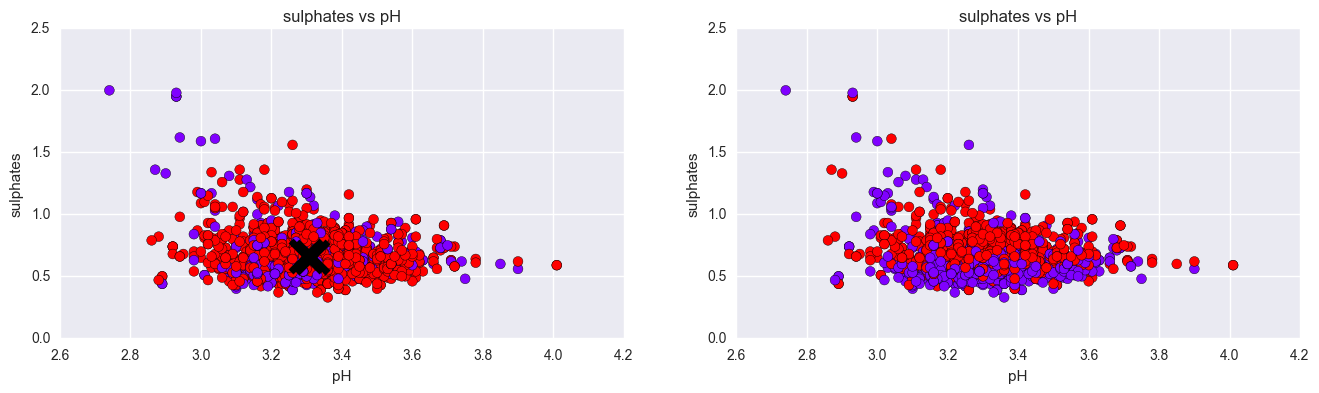

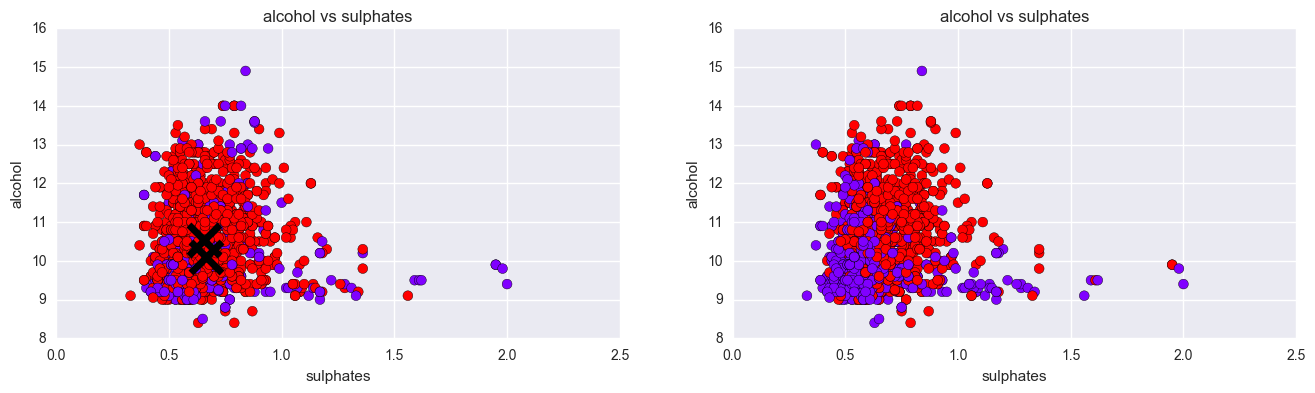

In [127]:
for i, _ in enumerate(X.columns[:-1]):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X.iloc[:,i], X.iloc[:,i+1], c=km.labels_, s=50, cmap='rainbow');
    ax[1].scatter(X.iloc[:,i], X.iloc[:,i+1], c=y, s=50, cmap='rainbow');
    ax[0].scatter(centroids[:, i], centroids[:, i+1],
                marker='x', s=500, linewidths=5,
                color='k', zorder=10);
    ax[0].set_xlabel(X.columns[i]);
    ax[0].set_ylabel(X.columns[i+1]);
    ax[0].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    ax[1].set_xlabel(X.columns[i]);
    ax[1].set_ylabel(X.columns[i+1]);
    ax[1].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

## 6. Choose scatters that look by eye without using any metrics

## 7. Perform evalutation metrics

In [128]:
metrics.accuracy_score(y, labels)

0.61225766103814883

In [129]:
metrics.silhouette_score(X, labels)

0.60342203473204903

In [130]:
print metrics.classification_report(y, labels)

             precision    recall  f1-score   support

          0       0.65      0.37      0.47       744
          1       0.60      0.83      0.70       855

avg / total       0.62      0.61      0.59      1599



In [131]:
conmat = metrics.confusion_matrix(y, labels)
conmat = pd.DataFrame(conmat, index=[i for i in Counter(y)], columns=[i for i in Counter(y)])
conmat

0    1
0  272  472
1  148  707

## 8. What is the optimal k?